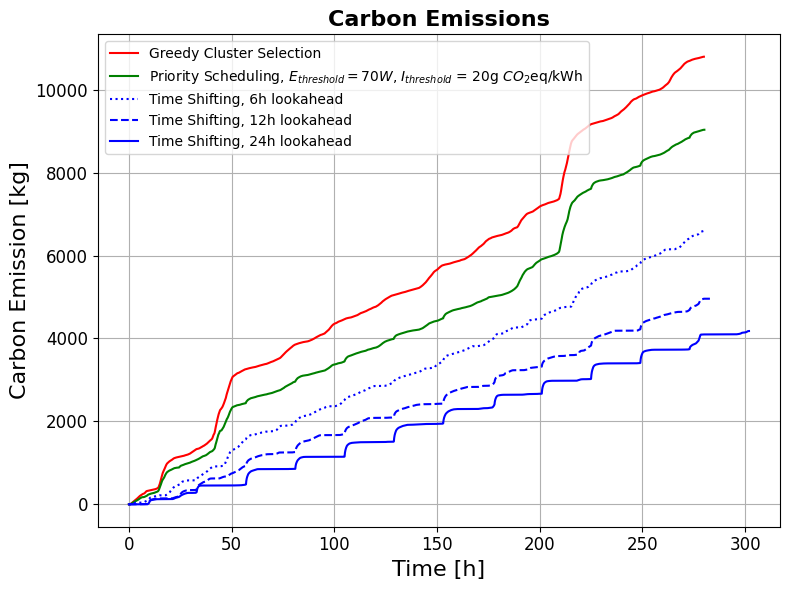

In [1178]:
import pandas as pd
import matplotlib.pyplot as plt

dir = "../results/100_single"

random_df_emission = pd.read_csv(dir + '/random/scheduler.csv')
random_df_emission['hours'] = random_df_emission['tick'] / 3600
random_df_emission['cumulative_emission'] = random_df_emission['cumulative_emission']

greedy_df_emission = pd.read_csv(dir + '/greedy/scheduler.csv')
greedy_df_emission['hours'] = greedy_df_emission['tick'] / 3600
greedy_df_emission['cumulative_emission'] = greedy_df_emission['cumulative_emission']

priority_df_emission = pd.read_csv(dir + '/priority/scheduler.csv')
priority_df_emission['hours'] = priority_df_emission['tick'] / 3600
priority_df_emission['cumulative_emission'] = priority_df_emission['cumulative_emission']

reservation_6h_df_emission = pd.read_csv(dir + '/reservation_6/scheduler.csv')
reservation_6h_df_emission['hours'] = reservation_6h_df_emission['tick'] / 3600
reservation_6h_df_emission['cumulative_emission'] = reservation_6h_df_emission['cumulative_emission']

reservation_12h_df_emission = pd.read_csv(dir + '/reservation_12/scheduler.csv')
reservation_12h_df_emission['hours'] = reservation_12h_df_emission['tick'] / 3600
reservation_12h_df_emission['cumulative_emission'] = reservation_12h_df_emission['cumulative_emission']

#reservation_12he_df_emission = pd.read_csv(dir + '/reservation_12e/scheduler.csv')
#reservation_12he_df_emission['hours'] = reservation_12he_df_emission['tick'] / 3600
#reservation_12he_df_emission['cumulative_emission'] = reservation_12he_df_emission['cumulative_emission']

reservation_24h_df_emission = pd.read_csv(dir + '/reservation_24/scheduler.csv')
reservation_24h_df_emission['hours'] = reservation_24h_df_emission['tick'] / 3600
reservation_24h_df_emission['cumulative_emission'] = reservation_24h_df_emission['cumulative_emission']

# Create the plot
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot cumulative emissions on the primary y-ais
#ax1.plot(random_df_emission['hours'], random_df_emission['cumulative_emission'], label='Random', color='blue')

ax1.plot(greedy_df_emission['hours'], greedy_df_emission['cumulative_emission'], label='Greedy Cluster Selection', color='red')
ax1.plot(priority_df_emission['hours'], priority_df_emission['cumulative_emission'], label=r'Priority Scheduling, $E_{threshold} = 70W$, $I_{threshold}$ = 20g $CO_{2}$eq/kWh', color='green')
ax1.plot(reservation_6h_df_emission['hours'], reservation_6h_df_emission['cumulative_emission'], label='Time Shifting, 6h lookahead', color='blue', linestyle='dotted')
ax1.plot(reservation_12h_df_emission['hours'], reservation_12h_df_emission['cumulative_emission'], label='Time Shifting, 12h lookahead', color='blue', linestyle='dashed')
#ax1.plot(reservation_12he_df_emission['hours'], reservation_12he_df_emission['cumulative_emission'], label='Time Reservation, 12h lookahead, energy', color='red', linestyle='dashed')
ax1.plot(reservation_24h_df_emission['hours'], reservation_24h_df_emission['cumulative_emission'], label='Time Shifting, 24h lookahead', color='blue', linestyle='solid')

ax1.set_xlabel('Time [h]', fontsize=16)
ax1.set_ylabel('Carbon Emission [kg]', color='black',fontsize=16)
ax1.tick_params(axis='y', labelcolor='black')

# Add legends for both axes
#fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
#fig.legend(loc='upper left', bbox_to_anchor=(0.15, 0.85))
plt.legend(loc='upper left')
ax1.grid(True)

#plt.xlim(230, 314)
#plt.ylim(100000, 200000)

#plt.xlim(0, 1)

# Add a title 
plt.title('Carbon Emissions', fontsize=16, fontweight='bold')

output_image_path = os.path.join("experiment1.png")
plt.savefig(output_image_path, dpi=300, bbox_inches='tight')  
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Show the plot
plt.tight_layout()
#plt.yscale('log')
plt.show()

# 307 hours total run time greedy binpack, and 295 hours greedy


In [1172]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load emissions data
dir = "../results/100_single"
random_df_emission = pd.read_csv(dir + '/random/scheduler.csv')
random_df_emission['hours'] = random_df_emission['tick'] / 3600
random_df_emission['cumulative_emission'] = random_df_emission['cumulative_emission']

greedy_df_emission = pd.read_csv(dir + '/greedy/scheduler.csv')
greedy_df_emission['hours'] = greedy_df_emission['tick'] / 3600
greedy_df_emission['cumulative_emission'] = greedy_df_emission['cumulative_emission']

greedy_binpack_df_emission = pd.read_csv(dir + '/greedy_binpack/scheduler.csv')
greedy_binpack_df_emission['hours'] = greedy_binpack_df_emission['tick'] / 3600
greedy_binpack_df_emission['cumulative_emission'] = greedy_binpack_df_emission['cumulative_emission']

delay_150_df_emission = pd.read_csv(dir + '/delay_150/scheduler.csv')
delay_150_df_emission['hours'] = delay_150_df_emission['tick'] / 3600
delay_150_df_emission['cumulative_emission'] = delay_150_df_emission['cumulative_emission']

delay_80_df_emission = pd.read_csv(dir + '/delay_80/scheduler.csv')
delay_80_df_emission['hours'] = delay_80_df_emission['tick'] / 3600
delay_80_df_emission['cumulative_emission'] = delay_80_df_emission['cumulative_emission']

reservation_24h_df_emission = pd.read_csv(dir + '/reservation_24/scheduler.csv')
reservation_24h_df_emission['hours'] = reservation_24h_df_emission['tick'] / 3600
reservation_24h_df_emission['cumulative_emission'] = reservation_24h_df_emission['cumulative_emission']

reservation_6h_df_emission = pd.read_csv(dir + '/reservation_6/scheduler.csv')
reservation_6h_df_emission['hours'] = reservation_6h_df_emission['tick'] / 3600
reservation_6h_df_emission['cumulative_emission'] = reservation_6h_df_emission['cumulative_emission']

# Load carbon intensity data
carbon_data_path = '/scratch/cognit/carbon/SE-SE4.csv'
carbon_df = pd.read_csv(carbon_data_path)
carbon_df['datetime'] = pd.to_datetime(carbon_df['datetime'])
carbon_df['hours'] = (carbon_df['datetime'] - carbon_df['datetime'].min()).dt.total_seconds() / 3600

# Filter for overlapping time range
end_time = min(greedy_df_emission['hours'].max(), carbon_df['hours'].max())
carbon_df = carbon_df[carbon_df['hours'] <= end_time]

# Plot combined data
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot cumulative emissions
#ax1.plot(greedy_df_emission['hours'], greedy_df_emission['cumulative_emission'], label='Greedy Cluster Selection', color='red')
#ax1.plot(greedy_binpack_df_emission['hours'], greedy_binpack_df_emission['cumulative_emission'], label=r'Priority Scheduling, $E_{threshold} = 70W$, $I_{threshold}$ = 20 gCO₂eq/kWh', color='green')
#ax1.plot(delay_80_df_emission['hours'], delay_80_df_emission['cumulative_emission'], label='Delayed Scheduling, 24h lookahead, $E_{threshold}$ = 80W', color='darkviolet', linestyle='solid')
#ax1.plot(delay_150_df_emission['hours'], delay_150_df_emission['cumulative_emission'], label='Delayed Scheduling, 24h lookahead, $E_{threshold}$ = 150W', color='darkviolet', linestyle='dashed')
#ax1.plot(reservation_6h_df_emission['hours'], reservation_6h_df_emission['cumulative_emission'], label='Time Reservation, 6h lookahead', color='green', linestyle='dashed')
ax1.plot(reservation_24h_df_emission['hours'], reservation_24h_df_emission['cumulative_emission'], label='Time Reservation, 24h lookahead', color='green', linestyle='solid')

ax1.set_xlabel('Time [hours]')
ax1.set_ylabel('Cumulative Carbon Emission [kg]', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Plot carbon intensity on a secondary axis
ax2 = ax1.twinx()
ax2.plot(carbon_df['hours'], carbon_df['carbonIntensity'], linestyle='solid', color='blue', label='CO2 Intensity')
ax2.set_ylabel('CO2 Intensity (gCO₂eq/kWh)', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Add legends
fig.legend(loc='upper left', bbox_to_anchor=(0.125, 0.88))
#fig.legend(loc='upper left')
#plt.legend(loc='upper left')
ax1.grid(True)

# Add a title
plt.title('Carbon Emissions and $CO_{2}$ Intensity', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

output_image_path = os.path.join("time_reservation_and_coi.png")
plt.savefig(output_image_path, dpi=300, bbox_inches='tight')  

# Adjust layout and show plot
plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '../results/100_single/greedy_binpack/scheduler.csv'